In [467]:
import json
import pandas as pd
from matplotlib import pyplot as plt

import scipy
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


# Notes
Punxsutawney Phil is, canonically, over 135 years old. The handlers of Punxsy Phil have the recipe for the elixir of life, which extends Phil's life 7 years per sip and refuse to tell us the recipe. 
* A decent number of Groundhogs aren't groundhogs, that's why I'm using that term as a proper noun
    * Look at these things, the JV squad of the Noah's Ark bowling team 
* I want you to look long into that cold, dark, truthful mirror and ask yourself "Which is a more reliable predictor - a groundhog or a golf club cover in the shape of a groundhog" 
* It's important that you understand how much every other groundhog organization hates Punxsutawney Phil's guts. Whenever one of these things disagrees with Phil, front page above the fold, bold, italic "SHUT UP, PHIL, THE ONLY SEASON THAT'S OVER IN MANITOBA IS US GIVING TWO CRAPS ABOUT YOUR FLEA-BITTEN ASS" 
    * There's only one non-Phil based rivalry, and it's in West Virginia, and the beef is because French Creek Freddie doesn't think Concord Charlie actually exists 
* One of these groundhogs bit Michael Bloomberg and was then allegeldy revenged by Bill de Blasio, but the Staten Island Zoo officials have not filed manslaughter charges (because they know what'll happen)
* Many Groundhogs also use their powers of prediction to determine how sports will pan out
* Groundhog festivals are usually held by some dude in a top hat who is super jazzed to be holding a marmot surrounded by other dudes in top hats super jazzed to be seeing one



One of them was nominated for an Emmy (look up, which demographic wasn't nominated for an emmy before a goddamn groundhog)
How deep does this thing go

# Ideas
* Clustering hogs based on predictions
* Are true hogs more accurate than false hogs
* Calculate anticipated temperature for a given winter based on what the preview (4,5,10) have been and then seeing where the true average is relative to that
* Binomial distribution of hog predictions to determine if they
* Is their prediction based on seeing their shadow or not?
* If there's time, how well do they do at predicting sports events

# Metric Definitions
* Groundhog - any prognosticator that makes a prediction as to the arrival or Spring or other such warmer weather, usually ceremoniously or at least annually on or about Feb 2
* Accuracy - If a prediction of longer winter, then we anticipate that the average temperature for February and March of that year will be at or below the average temperature from Dec-Mar of the last 3 years. If not, we expect the opposite 

# To do
* Groundhog pronouns
* Variable rolling window

# Sources
* https://groundhog-day.com/
* About a hundred small town newspaper websites and Facebook groups 
* https://www.ncei.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpcst-v1.0.0-20240705 for historical temperature data by state

In [378]:
with open('data/groundhogs.json') as f:
    raw_hogs = json.load(f)

In [379]:

tick = 200

rel_keys = list(raw_hogs['groundhogs'][0].keys())[:-2]
punx = 139
i = 0
hog_data = {k:[] for k in rel_keys}
prediction_data =  {'year': [], 'shadow': [], 'details': [], 'hog_id':[]}
for i in range(len(raw_hogs['groundhogs'])):
    for k in rel_keys:
        hog_data[k].append(raw_hogs['groundhogs'][i][k])
    for pred in raw_hogs['groundhogs'][i]['predictions']:
        for pk in prediction_data.keys():
            if pk != 'hog_id':
                prediction_data[pk].append(pred[pk])
            else:
                prediction_data[pk].append(hog_data['id'][-1])


In [111]:
hog_df = pd.DataFrame(hog_data)
hog_df['lat'] = hog_df['coordinates'].apply(lambda x: x.split(',')[0])
hog_df['lon'] = hog_df['coordinates'].apply(lambda x: x.split(',')[1])
hog_df['is_alliterative'] = (hog_df['name'].apply(lambda n : n.split(' ')[0][0].upper() == n.split(' ')[-1][0].upper())) * 1
hog_df['is_charles'] = (hog_df['name'].apply(lambda n :  any(word in n.upper() for word in ['CHARLES','CHUCK','CHARLIE','CHARLEY']))) * 1
hog_df['is_absolute_hog'] = (hog_df['type'] == 'Groundhog') * 1
hog_df['is_hog'] = (hog_df['type'].apply(lambda n :  any(word.upper() in n.upper() for word in ['groundhog']))) * 1
hog_df['is_human'] = (hog_df['type'].apply(lambda n :  'PERSON' in n.upper())) * 1
hog_df['is_alive'] = (hog_df['type'].apply(lambda n :  not(any(word.upper() in n.upper() for word in ['taxidermied','statue','plush','puppet'])))) * 1

In [ ]:
hog_df.to_csv('data/hogs.csv',sep='\t')

In [131]:
pred_df = pd.DataFrame(prediction_data).reset_index()
pred_df.rename({'index':'prediction_id'},axis=1,inplace=True)


In [238]:
pred_map = pd.merge(pred_df,hog_df[['id','city','region','country']],left_on='hog_id',right_on='id')[['shadow','prediction_id','year','details','hog_id','city','region','country']]
pred_map.to_csv('data/prediction_map.tsv',sep='\t')

In [342]:
pred_map[pred_map.hog_id == 3]

,shadow,prediction_id,year,details,hog_id,city,region,country
238,0.0,238,1955,"No Shadow, Early Spring!",3,Wiarton,Ontario,Canada
239,0.0,239,1956,"No Shadow, Early Spring!",3,Wiarton,Ontario,Canada
240,NaN,240,1957,No record,3,Wiarton,Ontario,Canada
241,NaN,241,1958,No record,3,Wiarton,Ontario,Canada
242,0.0,242,1959,"No Shadow, Early Spring!",3,Wiarton,Ontario,Canada
...,...,...,...,...,...,...,...,...
303,1.0,303,2020,"Shadow, Six More Weeks of Winter!",3,Wiarton,Ontario,Canada
304,0.0,304,2021,"No Shadow, Early Spring!",3,Wiarton,Ontario,Canada
305,0.0,305,2022,"No Shadow, Early Spring!",3,Wiarton,Ontario,Canada
306,0.0,306,2023,"No Shadow, Early Spring!",3,Wiarton,Ontario,Canada


In [138]:
sites = pred_map.groupby(['year','city','region','country']).sum().reset_index()[['year','city','region','country']]
sites.region.unique()

array(['Pennsylvania', 'Ontario', 'Wisconsin', 'West Virginia', 'Ohio',
       'Georgia', 'New York', 'Wyoming', 'Illinois', 'Manitoba',
       'Michigan', 'Nova Scotia', 'Nevada', 'North Carolina', 'Alberta',
       'Colorado', 'Washington', 'Idaho', 'Massachusetts', 'Connecticut',
       'New Jersey', 'Quebec', 'Texas', 'Iowa', 'Virginia', 'Alabama',
       'California', 'British Columbia', 'District of Columbia', 'Oregon',
       'Indiana', 'Maryland', 'Nebraska'], dtype=object)

In [218]:
state_codes = {
'001': 'Alabama',
'030': 'New York',
'002': 'Arizona',
'031': 'North Carolina',
'003': 'Arkansas',
'032': 'North Dakota',
'004': 'California',
'033': 'Ohio',
'005': 'Colorado',
'034': 'Oklahoma',
'006': 'Connecticut',
'035': 'Oregon',
'007': 'Delaware',
'036': 'Pennsylvania',
'008': 'Florida',
'037': 'Rhode Island',
'009': 'Georgia',
'038': 'South Carolina',
'010': 'Idaho',
'039': 'South Dakota',
'011': 'Illinois',
'040': 'Tennessee',
'012': 'Indiana',
'041': 'Texas',
'013': 'Iowa',
'042': 'Utah',
'014': 'Kansas',
'043': 'Vermont',
'015': 'Kentucky',
'044': 'Virginia',
'016': 'Louisiana',
'045': 'Washington',
'017': 'Maine',
'046': 'West Virginia',
'018': 'Maryland',
'047': 'Wisconsin',
'019': 'Massachusetts',
'048': 'Wyoming',
'020': 'Michigan',
'050': 'Alaska',
'021': 'Minnesota',
'022': 'Mississippi',
'023': 'Missouri',
'024': 'Montana',
'025': 'Nebraska',
'026': 'Nevada',
'027': 'New Hampshire',
'028': 'New Jersey',
'029': 'New Mexico',
}
dtype = {
    'id': str,
    'jan': float,
    'feb': float,
    'mar': float,
    'apr': float,
    'may': float,
    'jun': float,
    'jul': float,
    'aug': float,
    'sep': float,
    'oct': float,
    'nov': float,
    'dec': float,
}

temps = pd.read_csv('data/state_tmp_month_avg.txt',sep='_',dtype=dtype)

def state_mapper(time_loc_code):
    try:
        return state_codes[(time_loc_code)[0:3]]
    except:
        return None

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

temps['state'] = temps.id.apply(lambda r : state_mapper(r))
temps = temps[temps['state'].notna()]
temps['year'] = temps.id.apply(lambda r: r[-4:]).astype(int)
temps = temps[temps['year'] != 2024]
temp_df = temps[['state','year','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
temp_df.to_csv('data/simple_state_month_temp_averages.csv',index=False)


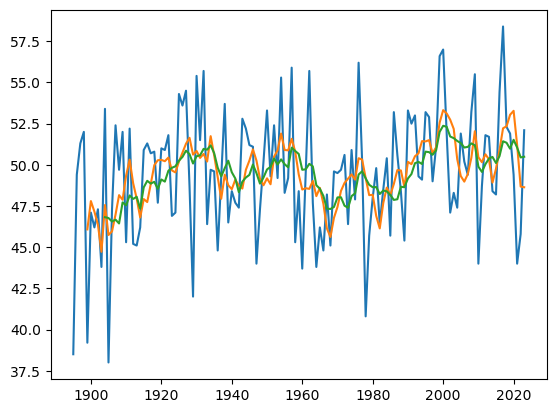

In [215]:
state = 'Texas'
data = temp_df[(temp_df['state'] == state)].year
labels_10 = temp_df[(temp_df['state'] == state)]['feb'].rolling(10).mean()
labels_5 = temp_df[(temp_df['state'] == state)]['feb'].rolling(5).mean()
labels_1 = temp_df[(temp_df['state'] == state)]['feb'].rolling(1).mean()
plt.plot(data,labels_1)
plt.plot(data,labels_5)
plt.plot(data,labels_10)

In [232]:
rolling_temps_df = temp_df[months].rolling(3).sum()
rolling_temps_df['before_prediction'] = (rolling_temps_df['nov'] + rolling_temps_df['dec'] + rolling_temps_df['jan'])/9
rolling_temps_df['after_prediction'] = (rolling_temps_df['feb'] + rolling_temps_df['mar'] + rolling_temps_df['apr'])/9
temp_df['before_prediction_avg'] = rolling_temps_df['before_prediction']
temp_df['after_prediction_avg'] = rolling_temps_df['after_prediction']

double_roll = rolling_temps_df[['before_prediction','after_prediction']].rolling(3).mean()
double_roll

temp_df['rolling_before_prediction_avg_3yr'] = double_roll['before_prediction']
temp_df['rolling_after_prediction_avg_3yr'] = double_roll['after_prediction']
temp_df

,state,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,before_prediction_avg,after_prediction_avg,rolling_before_prediction_avg_3yr,rolling_after_prediction_avg_3yr
0,Alabama,1895,43.1,37.4,54.5,63.4,69.5,77.5,79.2,79.5,77.8,59.7,53.2,44.9,NaN,NaN,NaN,NaN
1,Alabama,1896,43.5,47.7,52.5,68.0,75.9,77.4,81.2,82.2,75.9,63.2,57.3,46.4,NaN,NaN,NaN,NaN
2,Alabama,1897,41.8,51.1,60.2,62.4,69.0,81.2,81.5,78.8,75.6,67.1,54.2,47.4,47.977778,55.244444,NaN,NaN
3,Alabama,1898,49.0,46.1,59.2,58.8,74.1,80.4,80.0,78.8,75.2,61.0,49.8,43.4,48.088889,56.222222,NaN,NaN
4,Alabama,1899,43.8,40.0,55.6,61.7,76.1,79.9,80.4,80.9,72.8,66.0,55.3,44.7,47.711111,55.011111,47.925926,55.492593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,Alaska,2019,7.5,15.5,26.5,28.5,43.0,54.0,58.1,51.5,44.4,30.8,19.8,6.7,12.033333,18.777778,12.148148,18.662963
6335,Alaska,2020,-6.4,1.5,12.0,27.5,43.3,50.5,53.2,52.1,42.0,28.9,14.5,10.6,9.733333,18.766667,11.366667,18.729630
6336,Alaska,2021,10.6,1.0,9.1,23.9,40.3,50.9,53.9,49.4,39.4,27.9,4.6,6.8,8.300000,16.166667,10.022222,17.903704
6337,Alaska,2022,2.6,8.2,16.7,24.9,40.1,52.7,53.3,50.1,42.7,28.8,16.3,7.1,7.411111,13.866667,8.481481,16.266667


In [247]:
prediction_df = pred_map.dropna()
accuracy_df = pd.merge(prediction_df,temp_df,left_on=['region','year'],right_on=['state','year'],how='inner')

/var/folders/vv/vfkp_md141s7kfvvrkq_7hmw0000gn/T/ipykernel_32465/3027052257.py:12: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  measured_hogs_df['p_value'] = measured_hogs_df.apply(lambda row: scipy.stats.binom_test(row['hits'], row['predictions'], 0.5, alternative='greater'), axis=1)
/var/folders/vv/vfkp_md141s7kfvvrkq_7hmw0000gn/T/ipykernel_32465/3027052257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured_hogs_df['p_value'] = measured_hogs_df.apply(lambda row: scipy.stats.binom_test(row['hits'], row['predictions'], 0.5, alternative='greater'), axis=1)


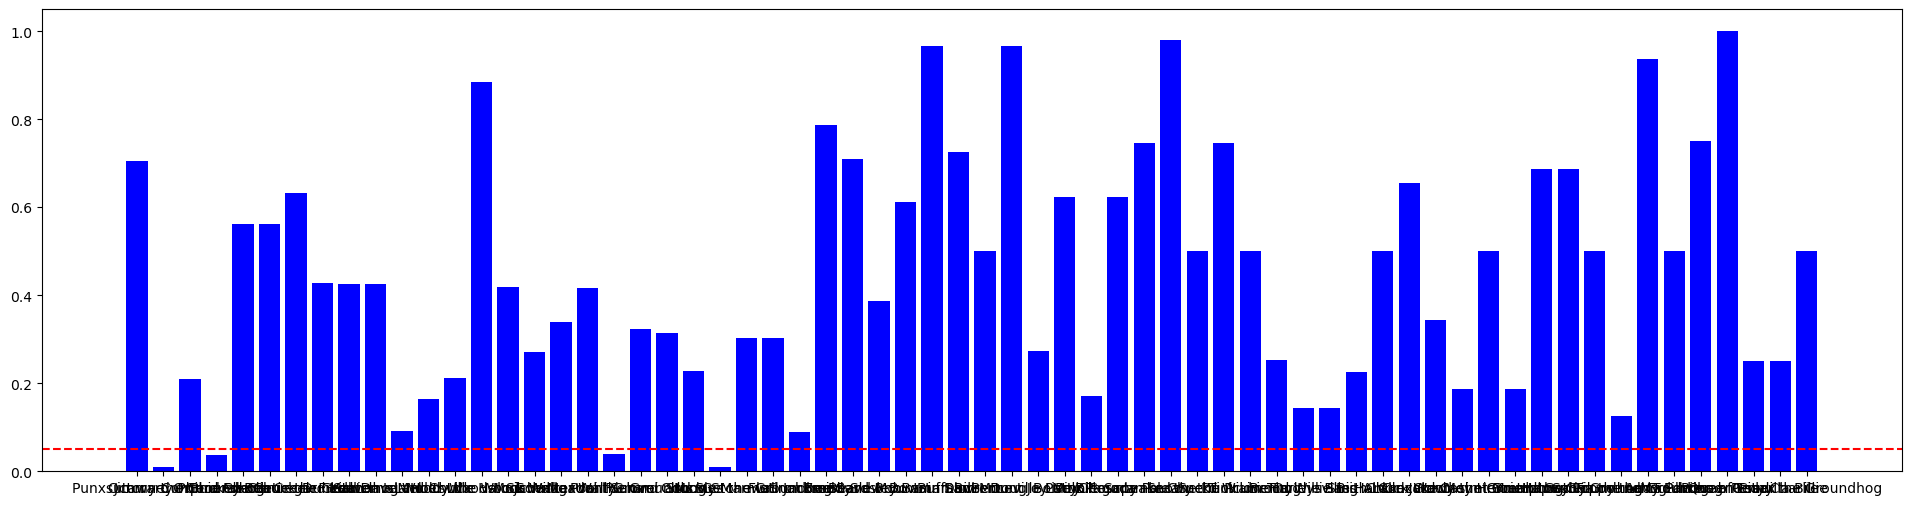

In [352]:
def is_correct(row):
    return 1 * ((row.shadow == 1 and row.after_prediction_avg <= row.rolling_after_prediction_avg_3yr) or (row.shadow == 0 and row.after_prediction_avg > row.rolling_after_prediction_avg_3yr))


accuracy_df['correct'] = accuracy_df.apply(lambda r : is_correct(r),axis=1)
hog_df['accuracy_3yr'] = hog_df.id.map(accuracy_df[['hog_id','correct']].groupby('hog_id').mean()[['correct']].reset_index().set_index('hog_id')['correct'].to_dict())
hog_df['hits'] = hog_df.id.map(accuracy_df[['hog_id','correct']].groupby('hog_id').sum()[['correct']].reset_index().set_index('hog_id')['correct'].to_dict())
hog_df['predictions'] = hog_df.id.map(accuracy_df[['hog_id','correct']].groupby('hog_id').count()[['correct']].reset_index().set_index('hog_id')['correct'].to_dict())

measured_hogs_df = hog_df[~hog_df['hits'].isna()]

measured_hogs_df['p_value'] = measured_hogs_df.apply(lambda row: scipy.stats.binom_test(row['hits'], row['predictions'], 0.5, alternative='greater'), axis=1)

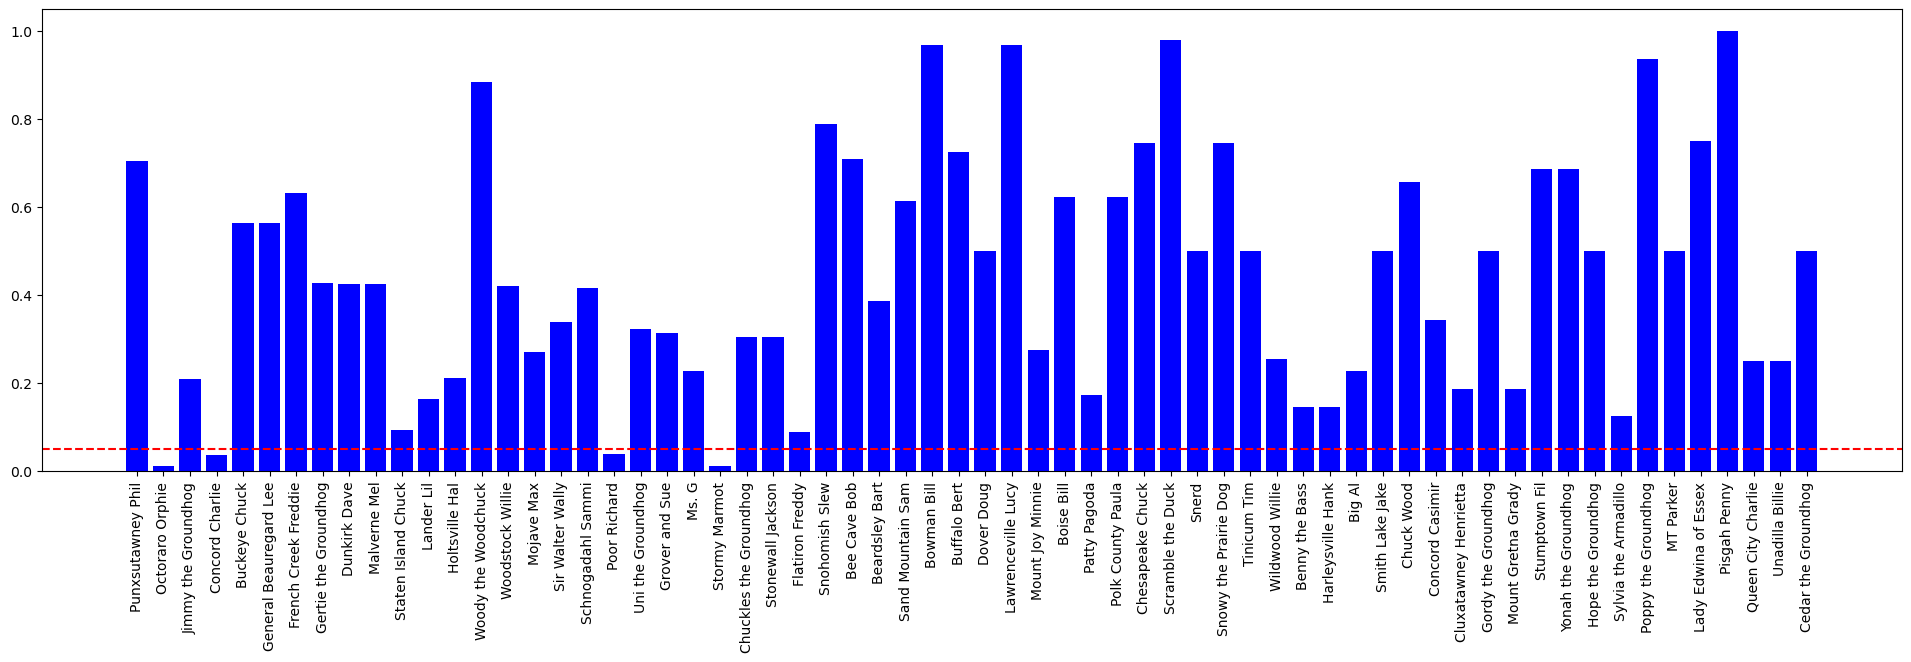

In [357]:
plt.figure(figsize=(24, 6))
plt.bar(measured_hogs_df['name'], measured_hogs_df['p_value'], color='blue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.xticks(rotation=90)
plt.show()

In [363]:
measured_hogs_df.sort_values('hits',ascending=False)

,id,slug,shortname,name,city,region,country,coordinates,source,contact,...,is_alliterative,is_charles,is_absolute_hog,is_hog,is_human,is_alive,accuracy_3yr,predictions,hits,p_value
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,...,1,0,1,1,0,1,0.480000,125.0,60.0,0.704158
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",https://orphie.neocities.org,,...,1,0,0,1,0,0,0.626374,91.0,57.0,0.010292
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,...,0,0,1,1,0,1,0.563636,55.0,31.0,0.209377
4,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,...,1,1,0,1,0,1,0.644444,45.0,29.0,0.036227
5,6,buckeye-chuck,Chuck,Buckeye Chuck,Marion,Ohio,USA,"40.6141291,-83.1321507,",https://en.wikipedia.org/wiki/Buckeye_Chuck#Pa...,,...,0,1,1,1,0,1,0.500000,40.0,20.0,0.562685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,unadilla-billie,Billie,Unadilla Billie,Unadilla,Nebraska,USA,"40.6834005,-96.2751068",https://www.facebook.com/profile.php?id=100064...,,...,0,0,0,1,0,0,1.000000,2.0,2.0,0.250000
70,71,poppy-the-groundhog,Poppy,Poppy the Groundhog,Millersville,Pennsylvania,USA,"40.1213254,-76.6644525",https://www.facebook.com/AcornAcresWR,info@acornacreswr.com,...,0,0,1,1,0,1,0.250000,4.0,1.0,0.937500
73,74,lady-edwina-of-essex,Lady Edwina,Lady Edwina of Essex,West Orange,New Jersey,USA,"40.7674513,-74.2839038",https://www.facebook.com/TurtleBackZoo/,,...,0,0,1,1,0,1,0.500000,2.0,1.0,0.750000
78,79,cedar-the-groundhog,Cedar,Cedar the Groundhog,West Dundee,Illinois,USA,"42.1157016,-88.3362437",https://www.facebook.com/RandallOaksZoo,,...,0,0,1,1,0,1,1.000000,1.0,1.0,0.500000


In [395]:
temp_df['long_winter'] = (temp_df['after_prediction_avg'] < temp_df['rolling_after_prediction_avg_3yr']) * 1
long_ratio_prep = pd.merge(temp_df.groupby('state').sum()[['long_winter']].reset_index(),temp_df.groupby('state').count()[['long_winter']].reset_index(),on='state',suffixes=['_sum','_count'])
long_ratio_prep['long_winter_ratio'] = long_ratio_prep['long_winter_sum'] / long_ratio_prep['long_winter_count']
pd.merge(hog_df,long_ratio_prep[['state','long_winter_ratio']],left_on='region',right_on='state')


,id,slug,shortname,name,city,region,country,coordinates,source,contact,...,is_charles,is_absolute_hog,is_hog,is_human,is_alive,accuracy_3yr,predictions,hits,state,long_winter_ratio
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,...,0,1,1,0,1,0.480000,125.0,60.0,Pennsylvania,0.496124
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",https://orphie.neocities.org,,...,0,0,1,0,0,0.626374,91.0,57.0,Pennsylvania,0.496124
2,21,schnogadahl-sammi,Sammi,Schnogadahl Sammi,Kresgeville,Pennsylvania,USA,"40.9014222,-75.497874",https://groundhoglodge.org/schedule/groundhog-...,,...,0,0,1,0,0,0.545455,22.0,12.0,Pennsylvania,0.496124
3,22,poor-richard,Richard,Poor Richard,York,Pennsylvania,USA,"39.9658603,-76.729263",http://www.yorkslumberinggroundhoglodge.com,,...,0,0,1,0,0,0.714286,21.0,15.0,Pennsylvania,0.496124
4,24,uni-the-groundhog,Uni,Uni the Groundhog,Myerstown,Pennsylvania,USA,"40.4181266,-76.2999232",https://www.facebook.com/Grundsau-Lodsch-17-Om...,,...,0,0,1,0,0,0.578947,19.0,11.0,Pennsylvania,0.496124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,chuck-wood,Chuck,Chuck Wood,Quincy,California,USA,"39.9362979,-120.9523743",https://www.facebook.com/GroundhogFeverFest/,,...,1,0,1,0,1,0.500000,6.0,3.0,California,0.519380
61,67,stumptown-fil,Filbert,Stumptown Fil,Portland,Oregon,USA,"45.5100569,-122.7158264",https://www.facebook.com/oregonzoo,,...,0,0,0,0,1,0.500000,4.0,2.0,Oregon,0.496124
62,69,hope-the-groundhog,Hope,Hope the Groundhog,Hope,Indiana,USA,"39.303483,-85.7731068",https://www.facebook.com/profile.php?id=100064...,,...,0,1,1,0,1,0.666667,3.0,2.0,Indiana,0.480620
63,77,queen-city-charlie,Charlie,Queen City Charlie,Cumberland,Maryland,USA,"39.6528658,-78.7646866",https://www.facebook.com/cityofcumberlandmd,melinda.kelleher@cumberlandmd.gov,...,1,0,1,1,1,1.000000,2.0,2.0,Maryland,0.465116


# How good is Snowy?
Snow is the only groundhog with written records pertaining to their success. If our records disagree with theirs, we may need to adjust success definition

In [426]:
pd.set_option('display.max_colwidth', 0)
snowy = accuracy_df[accuracy_df['hog_id'] == 51][['year','details','before_prediction_avg','after_prediction_avg','rolling_before_prediction_avg_3yr','rolling_after_prediction_avg_3yr','correct','shadow']]
snowy['accuracy_review_review'] = [1,1,0,.8,1,.5,1,.2,np.nan]
mean_review = snowy[snowy['year'] < 2023].accuracy_review_review.mean()
print(f"Snowy's prediction reviews were accurate up to {mean_review:.1%}. This is mostly arbitrary, but so were the ratings so deal with it.")
snowy

Snowy's prediction reviews were accurate up to 68.8%. This is mostly arbitrary, but so were the ratings so deal with it.


,year,details,before_prediction_avg,after_prediction_avg,rolling_before_prediction_avg_3yr,rolling_after_prediction_avg_3yr,correct,shadow,accuracy_review_review
1006,2015,Snowy DID NOT see her shadow and winter was a no-show during the 2nd half of the season. Accuracy Score: Excellent,33.533333,40.811111,33.229630,39.618519,1,0.0,1.0
1008,2016,Snowy DID NOT see her shadow and the 2nd half of winter was mild. Accuracy Score: Excellent,34.433333,42.155556,33.796296,40.774074,1,0.0,1.0
1010,2017,Snowy DID see her shadow and winter did indeed continue. Accuracy Score: Excellent,33.077778,42.022222,33.681481,41.662963,0,1.0,0.0
1012,2018,"Snowy DID NOT see her shadow, but winter weather intensified & persisted into spring. Accuracy Score: Poor",33.511111,40.388889,33.674074,41.522222,0,0.0,0.8
1014,2019,"Snowy DID NOT see her shadow, but instead of an early spring, we got snow and Arctic air! Accuracy Score: Very Poor!",33.866667,37.644444,33.485185,40.018519,0,0.0,1.0
1016,2020,"Snowy SAW her shadow. A wintry pattern continued, but there were also some nice spring-like days! Her Score: Fair",35.322222,38.244444,34.233333,38.759259,1,1.0,0.5
1018,2021,Snowy DID NOT see her shadow and an early spring arrived after some brief cold weather. Accuracy Score: Excellent!,34.966667,38.400000,34.718519,38.096296,1,0.0,1.0
1020,2022,Snowy DID see her shadow and a mixed bag of wintry weather continued. Accuracy Score: Fair,33.222222,39.311111,34.503704,38.651852,0,1.0,0.2
1022,2023,Snowy DID NOT see her shadow in contradiction to Punxsutawney Phil’s result... Accuracy Score: Stay tuned!,33.411111,38.522222,33.866667,38.744444,0,0.0,NaN


# Building Guff the Groundhog
The goal is to beat 81.3% with math, thereby making Guff the Groundhog the king of all hogs and trouncing Stormy The False

By one-hot encoding the state of the prediction, looking at a rolling average, and the average temperature before a prediction, we should be able to determine if the temperature after a prediction will be higher than what we expect it to be from the rolling averages

In [439]:
# Listing of nemeses
hog_df[hog_df['id'].isin([2,5,27])][['name','hits','predictions','accuracy_3yr']]

,name,hits,predictions,accuracy_3yr
1,Octoraro Orphie,57.0,91.0,0.626374
4,Concord Charlie,29.0,45.0,0.644444
26,Stormy Marmot,13.0,16.0,0.812500


In [486]:
feats = list(temp_df.columns)[1:]
label = 'after_prediction_avg'
feats.remove(label)
data = temp_df.dropna()[feats]
labels = temp_df.dropna()[label]

In [487]:
data

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,before_prediction_avg,rolling_before_prediction_avg_3yr,rolling_after_prediction_avg_3yr,long_winter
4,1899,43.8,40.0,55.6,61.7,76.1,79.9,80.4,80.9,72.8,66.0,55.3,44.7,47.711111,47.925926,55.492593,1
5,1900,43.6,44.4,52.9,64.2,71.4,76.3,79.8,81.2,77.6,68.2,54.7,46.6,47.877778,47.892593,54.962963,1
6,1901,46.0,43.1,53.3,58.1,70.6,78.8,82.4,78.7,72.4,62.5,48.7,42.1,47.277778,47.622222,53.751852,1
7,1902,43.2,40.8,55.1,62.1,75.7,81.2,83.1,82.3,73.6,63.1,57.6,45.2,47.522222,47.559259,52.970370,1
8,1903,43.4,48.2,59.5,61.1,69.8,73.6,80.4,80.6,73.2,63.2,50.6,40.1,46.322222,47.040741,52.911111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,2019,7.5,15.5,26.5,28.5,43.0,54.0,58.1,51.5,44.4,30.8,19.8,6.7,12.033333,12.148148,18.662963,0
6335,2020,-6.4,1.5,12.0,27.5,43.3,50.5,53.2,52.1,42.0,28.9,14.5,10.6,9.733333,11.366667,18.729630,0
6336,2021,10.6,1.0,9.1,23.9,40.3,50.9,53.9,49.4,39.4,27.9,4.6,6.8,8.300000,10.022222,17.903704,1
6337,2022,2.6,8.2,16.7,24.9,40.1,52.7,53.3,50.1,42.7,28.8,16.3,7.1,7.411111,8.481481,16.266667,1


In [489]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels,random_state=614)
lr = LinearRegression()
lr.fit(train_data,train_labels)
for col, coef in zip(feats,lr.coef_):
    print(f"{col}: {coef}")
print(f"+ {lr.intercept_:,}")
print("Score:",lr.score(train_data,train_labels))

year: 0.0001391925297224446
jan: -0.025231526845556462
feb: 0.06328063816726541
mar: 0.05347754809682141
apr: 0.027089091042043056
may: 0.024228097208091097
jun: -0.01195686677059551
jul: 0.0042114520660866735
aug: -0.015644826110647915
sep: 0.009043400030942879
oct: 0.022382780043718464
nov: -0.024167637100469132
dec: -0.025546552578704754
before_prediction_avg: 0.34289823373833217
rolling_before_prediction_avg_3yr: -0.2973156953381599
rolling_after_prediction_avg_3yr: 0.854956288827694
long_winter: -1.0022520687262972
+ -0.01562818528798715
Score: 0.9965908009963352
